In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from tqdm import tqdm_notebook
import concurrent.futures
from multiprocessing import Pool
import copy,os,sys,psutil
from collections import Counter


In [37]:
import os
import json
import cv2
from matplotlib import pyplot as plt

In [8]:
base_dir = "/home/zhoutong/facedata/CASIA-maxpy-clean"
sub_dir_list = [os.path.join(base_dir,i) for i in os.listdir(base_dir)]

In [12]:
res_path_list = []
for sub_dir in sub_dir_list:
    if os.path.isdir(sub_dir):
        res_path_list.extend([os.path.join(sub_dir,i) for i in os.listdir(sub_dir) if ".json" in i])

In [14]:
with open("/home/zhoutong/facedata/all_json_file_path.txt","w") as f:
    for i in res_path_list:
        f.writelines(i+"\n")

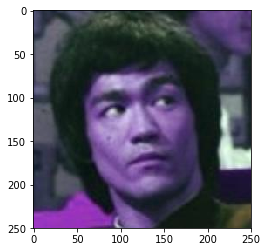

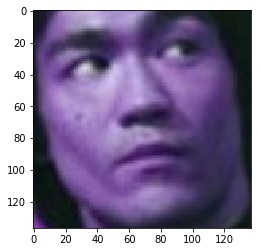

Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .   
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
    .   single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function, with these exceptions:
    .   
    .   - 16-bit unsigned (CV_16U) images can be saved in the case of PNG, JPEG 2000, and TIFF formats
    .   - 32-bit float (CV_32F) images can be saved in PFM, TIFF, OpenEXR, and Radiance HDR formats;
    .   3-channel (CV_32FC3) TIFF images will be saved using the LogLuv high dynamic range encoding
    .   (4 bytes per pixel)
    .   - PNG images with an alpha channel can be saved using this function. To do this, create
    .   8-bit (or 16-bit) 4-channel image BGRA, where the alpha chann

In [43]:
json_path = res_path_list[0]
img_path = os.path.splitext(res_path_list[0])[0]+".jpg"
img = cv2.imread(img_path)
with open(res_path_list[0],"r") as f:
    feature = json.load(f)
# [{'face_rectangle':i['face_rectangle'],'ethnicity':i['ethnicity'],'beauty':i['beauty']} for i in feature['faces']]

rect_list = [i['face_rectangle'] for i in feature['faces']]
(top,left,width,height) = (rect_list[0]['top'],rect_list[0]['left'],rect_list[0]['width'],rect_list[0]['height'])
attribute_list = [i['attributes']['ethnicity'] for i in feature['faces']]

plt.imshow(img)
plt.show()

plt.imshow(img[top:top+height,left:left+width])
plt.show()
